### Description of the dataset from Kaggle.com: 

Free Code Camp is an open source community where you learn to code and build projects for nonprofits.

CodeNewbie.org is the most supportive community of people learning to code.

Together, we surveyed more than 15,000 people who are actively learning to code. We reached them through the twitter accounts and email lists of various organizations that help people learn to code.

Our goal was to understand these people's motivations in learning to code, how they're learning to code, their demographics, and their socioeconomic background.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [2]:
all_df = pd.read_csv("2016_New_Coders_Survey.csv", low_memory=False)

In [3]:
all_df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [4]:
all_df.shape

(15620, 113)

In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


In [6]:
all_df.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventBootcamp', 'CodeEventCoffee',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam',
       'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup',
       'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther',
       'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop',
       'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther',
       'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren',
       'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet',
       'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'Hou

In [7]:
all_df['Gender'].unique()

array(['male', 'female', nan, 'genderqueer', 'agender', 'trans'], dtype=object)

Create 3 dataframes for Male, Female, and LGBTQ+

In [8]:
# creating a new df with only female 
female_df = all_df[all_df["Gender"] == "female"]

In [9]:
# double check that there are only "female" values
female_df["Gender"].unique()

array(['female'], dtype=object)

In [10]:
# create a new df with only male
male_df = all_df[all_df["Gender"] == "male"]

In [11]:
# double check that there are only male values
male_df["Gender"].unique()

array(['male'], dtype=object)

In [12]:
# create a new df for other genders
lgbtq_plus_df = all_df[all_df["Gender"].apply(lambda x: x not in ["female", "male"])]

In [13]:
# double check that all the other gender values are included
lgbtq_plus_df["Gender"].unique()

array([nan, 'genderqueer', 'agender', 'trans'], dtype=object)

# Data Exploration

### Questions to ask: 

Exploring the assumption that more men have college degrees related to CS or engineering and if this is the case, it is interesting to consider how this influences women's attendence in bootcamps or their confidence to attended other career boosting activities.

- Out of the 20% of women in the survey, what percentage has a degree in CS or engineering?

### Prediction? 

Can we predict if the new coder is a man or a woman based on the new coder's university major?

# Gender 

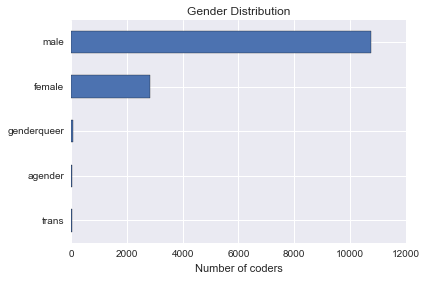

In [14]:
gender = all_df.Gender.value_counts(ascending=True)

ax = gender.plot(kind='barh', width=0.5)
_ = (ax.set_title('Gender Distribution'),
    ax.set_xlabel('Number of coders'))

### Majors for Women

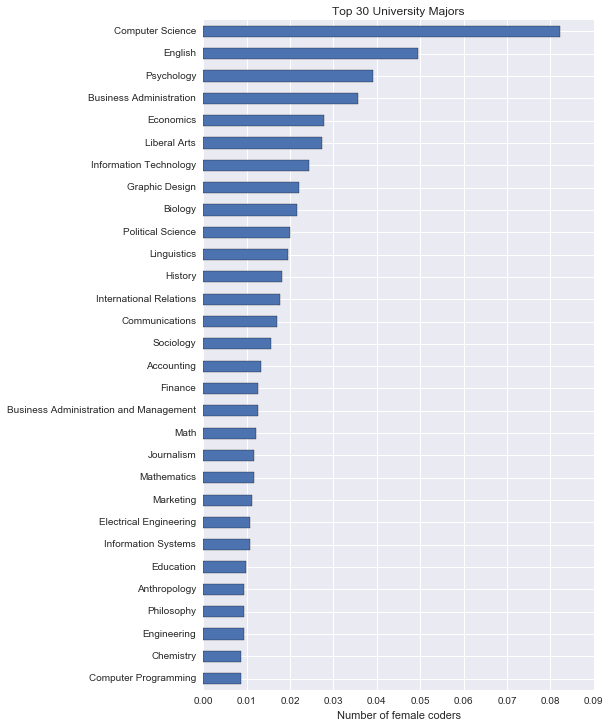

In [15]:
major_female = female_df.SchoolMajor.value_counts(normalize=True, ascending=True)[-30:]

ax = major_female.plot(kind='barh', figsize=(7,12), width=0.5)
_ = (ax.set_title('Top 30 University Majors'), 
    ax.set_xlabel('Number of female coders'))

### Majors for Men

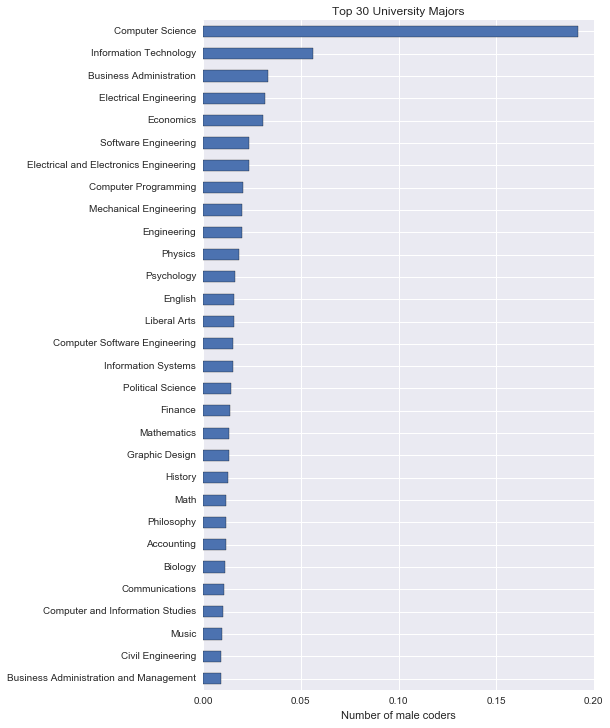

In [16]:
major_male = male_df.SchoolMajor.value_counts(normalize=True, ascending=True)[-30:]

ax = major_male.plot(kind='barh', figsize=(7,12), width=0.5)
_ = (ax.set_title('Top 30 University Majors'), 
    ax.set_xlabel('Number of male coders'))

### Majors for LGBTQ+

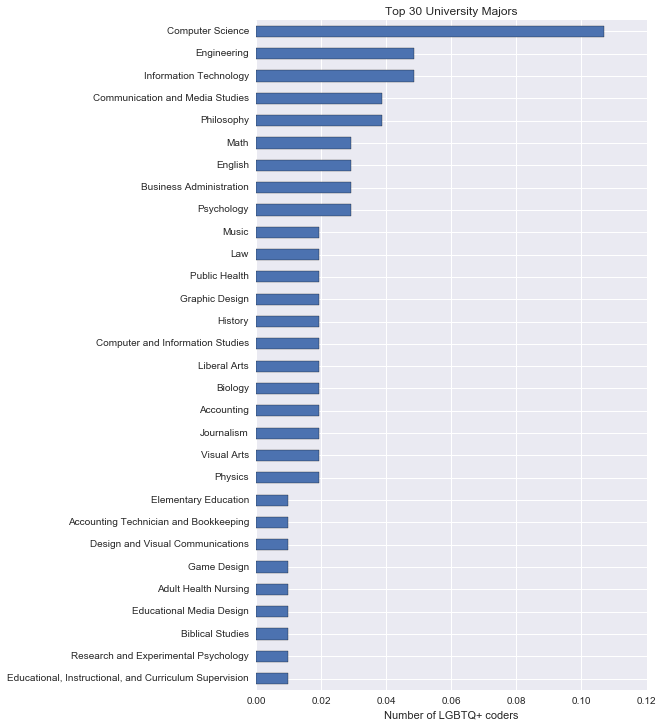

In [17]:
major_lgbtq_plus = lgbtq_plus_df.SchoolMajor.value_counts(normalize=True, ascending=True)[-30:]

ax = major_lgbtq_plus.plot(kind='barh', figsize=(7,12), width=0.5)
_ = (ax.set_title('Top 30 University Majors'), 
    ax.set_xlabel('Number of LGBTQ+ coders'))